In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Curvature Plot Between Two Surfaces

Let's consider A and B surfaces represented by depth maps DA and DB, and kDA, kDB curvature at each coordinate (x, y). Curvature $K \in \{-\mathbb{R}, \mathbb{R}\}$, then its plot must consider kDA and kDB negative and positive relations.

In [17]:
# Creates a visualization of the difference between curvatures kDA and kDB
A = np.array([
    [ 1, 5, 9],    # A > 0 and A > B
    [ 1, 5, 3],    # A > 0 and A < B
    [ 0, 0, 0],    # A = 0 and A > B
    [ 0, 0, 0],    # A = 0 and A < B
    [ -3, -5, -9], # A < and e A > B
    [ -2, -3, -5], # A < and e A < B
])

B = np.array([
    [ 0, 3, 6],
    [ 2, 7, 6],
    [ -1, -2, -3],
    [ 1, 2, 3],
    [ -2, -3, -6],
    [ -3, -5, -9],
])

In [18]:
result = np.zeros_like(A)

ApBp = np.where((A >= 0) & (B >= 0)) # (A, B) = (+, +)
AnBp = np.where((A < 0) & (B >= 0))  # (A, B) = (-, +)
ApBn = np.where((A >= 0) & (B < 0))  # (A, B) = (+, -)
AnBn = np.where((A < 0) & (B < 0))   # (A, B) = (-, -)

#(A, B) = (+, +) = A - B
result[ApBp] = A[ApBp] - B[ApBp]

#(A, B) = (-, +) = A - B
result[AnBp] = A[AnBp] - B[AnBp]

#(A, B) = (+, -) = |B| + A
result[ApBn] = abs(B[ApBn]) + A[ApBn]

#(A, B) = (-, -) = A + |B|
result[AnBn] = A[AnBn] + abs(B[AnBn])

*   When kA is to the left of kB on the real line, the difference is positive (red).

*   When kA is to the right of kB on the real line, the difference is negative (blue).

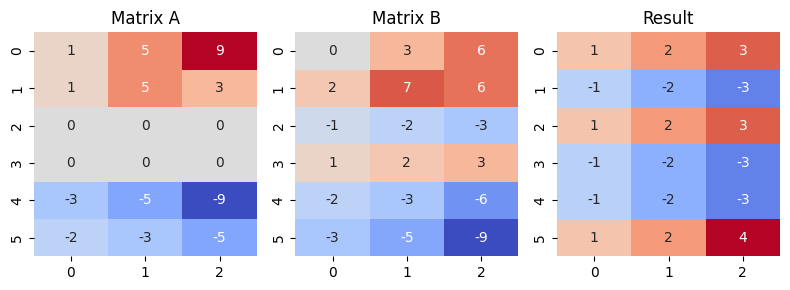

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

# Plot A
sns.heatmap(A, annot=True, fmt="d", cmap=plt.cm.coolwarm, center=0, cbar=False, ax=axs[0])
axs[0].set_title("Matrix A")

# Plot B
sns.heatmap(B, annot=True, fmt="d", cmap=plt.cm.coolwarm, center=0, cbar=False, ax=axs[1])
axs[1].set_title("Matrix B")

# Plot RESULT
sns.heatmap(result, annot=True, fmt="d", cmap=plt.cm.coolwarm, center=0, cbar=False, ax=axs[2])
axs[2].set_title("Result")

plt.tight_layout()
plt.show()

# Creating a function to compute differences

In [20]:
def compute_surfaces_difference(A, B):
    diff = np.zeros_like(A)

    ApBp = np.where((A >= 0) & (B >= 0)) # (A, B) = (+, +)
    AnBp = np.where((A < 0) & (B >= 0))  # (A, B) = (-, +)
    ApBn = np.where((A >= 0) & (B < 0))  # (A, B) = (+, -)
    AnBn = np.where((A < 0) & (B < 0))   # (A, B) = (-, -)

    #(A, B) = (+, +) = A - B
    diff[ApBp] = A[ApBp] - B[ApBp]

    #(A, B) = (-, +) = A - B
    diff[AnBp] = A[AnBp] - B[AnBp]

    #(A, B) = (+, -) = |B| + A
    diff[ApBn] = abs(B[ApBn]) + A[ApBn]

    #(A, B) = (-, -) = A + |B|
    diff[AnBn] = A[AnBn] + abs(B[AnBn])

    return diff

def plot_surfaces_difference(A, B, diff, figsize):
    fig, axs = plt.subplots(1, 3, figsize=figsize)

    # Plot A
    sns.heatmap(A, annot=True, fmt="d", cmap=plt.cm.coolwarm, center=0, cbar=False, ax=axs[0])
    axs[0].set_title("Matrix A")

    # Plot B
    sns.heatmap(B, annot=True, fmt="d", cmap=plt.cm.coolwarm, center=0, cbar=False, ax=axs[1])
    axs[1].set_title("Matrix B")

    # Plot RESULT
    sns.heatmap(diff, annot=True, fmt="d", cmap=plt.cm.coolwarm, center=0, cbar=False, ax=axs[2])
    axs[2].set_title("Result")

    plt.tight_layout()
    plt.show()

In [21]:
A = np.array([
    [-5,-3,3,5,2,5,-5,-2]
])

B = np.array([
    [3,5,-5,-3,5,2,-2,-5]
])

In [22]:
diff = compute_surfaces_difference(A, B)

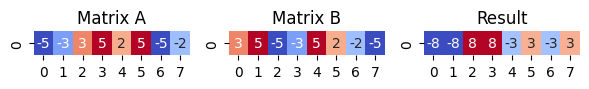

In [23]:
plot_surfaces_difference(A, B, diff, figsize=(6, 1))